# **Exploratory Data Analysis with Python - Case Study**
Analysis of video game sales from 1980 to 2016.

# **Introduction**
![](https://images.pexels.com/photos/1637436/pexels-photo-1637436.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)

Video games, are electronic games that involve interaction with a user interface or input device – such as a joystick, controller, keyboard, or motion sensing device – to generate visual feedback. This feedback mostly commonly is shown on a video display device, such as a TV set, monitor, touchscreen, or virtual reality headset. Some computer games do not always depend on a graphics display; for example, text adventure games and computer chess can be played through teletype printers. Video games are often augmented with audio feedback delivered through speakers or headphones, and sometimes with other types of feedback, including haptic technology.

Video games are defined based on their platform, which include arcade video games, console games, and personal computer (PC) games. More recently, the industry has expanded onto mobile gaming through smartphones and tablet computers, virtual and augmented reality systems, and remote cloud gaming. Video games are classified into a wide range of genres based on their type of gameplay and purpose. Read more on video games [here]().

We will be moving foward to analysing the vgsales dataset from [kaggle](https://www.kaggle.com/datasets/kedokedokedo/vgsales).

## **Description**

This dataset contains a list of video games with sales greater than 100,000 copies. It was generated by a scrape of [vgchartz.com](vgchartz.com).
Fields include;
* Name - The games name
* Platform - Platform of the games release (i.e. PC,PS4, etc.)
* Year - Year of the game's release
* Genre - Genre of the game
* Publisher - Publisher of the game
* NA_Sales - Sales in North America (in millions)
* EU_Sales - Sales in Europe (in millions)
* JP_Sales - Sales in Japan (in millions)
* Other_Sales - Sales in the rest of the world (in millions)
* Global_Sales - Total worldwide sales.

# **Objective**

In this project I will deal only with exploratory analysis, where the objective is to understand how the data is distributed and generate insight for future decision-making, this analysis aims to explore as much as possible the data in a simple, intuitive and informative way. The data used in this project contains information only from 1980 to 2016. Below the steps taken to achieve the objective.

**Outline:**
1. [Import Libraries and Load Data](#1-bullet)
2. [Descriptive Analyis](#2-bullet)
3. [Exploratory Analysis](#4-bullet)

# **1. Import Libraries and Data Loading** <a class="level-1" id="1-bullet"></a>

## **a. Import Libraries**

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
import os

sns.set_style('darkgrid')
plt.rcParams['font.size'] = 18
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

## **b. Data Loading**

In [2]:
url = "https://www.kaggle.com/datasets/kedokedokedo/vgsales"
od.download(url)

Skipping, found downloaded files in ".\vgsales" (use force=True to force download)


In [3]:
vg_df = pd.read_csv("./vgsales/vgsales.csv", index_col="Rank").sort_index()

We rename the sales columns for plotting purpose

In [4]:
new_names = ["NA Sales", "EU Sales", "JP Sales", "Other Sales", "Global Sales"]
for n, nw in zip(vg_df.loc[0:, "NA_Sales": "Global_Sales"].columns, new_names):
    vg_df.rename(columns={n:nw}, inplace=True)
    
vg_df.head()

,Name,Platform,Year,Genre,Publisher,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# **2. Descriptive Analyis** <a class="lvl1" id="2-bullet"></a>

This section will help us understand the data by determinng the max, min, mean and the range as well as identify missing values.

Measures of standard tendency

In [5]:
vg_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16324 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16324 non-null  object 
 1   Platform      16324 non-null  object 
 2   Year          16324 non-null  int64  
 3   Genre         16324 non-null  object 
 4   Publisher     16288 non-null  object 
 5   NA Sales      16324 non-null  float64
 6   EU Sales      16324 non-null  float64
 7   JP Sales      16324 non-null  float64
 8   Other Sales   16324 non-null  float64
 9   Global Sales  16324 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.9+ MB


In [6]:
vg_df.isna().sum()

Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA Sales         0
EU Sales         0
JP Sales         0
Other Sales      0
Global Sales     0
dtype: int64

As we can see there are 36 missing values in the Publisher column of the dataframe. Since we will need the publisher column for the analysis we will remove all null values.

In [7]:
vg_df.dropna(inplace=True)
vg_df.describe()

,Year,NA Sales,EU Sales,JP Sales,Other Sales,Global Sales
count,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000,16288.000000
mean,2006.403364,0.265696,0.147758,0.078845,0.048435,0.541007
std,5.830172,0.822500,0.509346,0.311907,0.190099,1.567473
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2016.000000,41.490000,29.020000,10.220000,10.570000,82.740000


<div align="justify">We can see that the games in the data were launched between 1980 to 2016 with 50% of the games launched from 2007 to 2016. The data equally shows that on average the North American region purchase more games than other regions followed by the Europe. The world record of game copies sold was 82.74 million</div>

# **3. Exploratory Analysis** <a class="lvl1" id="4-bullet"></a>

## **Number of Games Released per Year**

We will need to remove the games that appear more than as they where ported to new platforms or released.

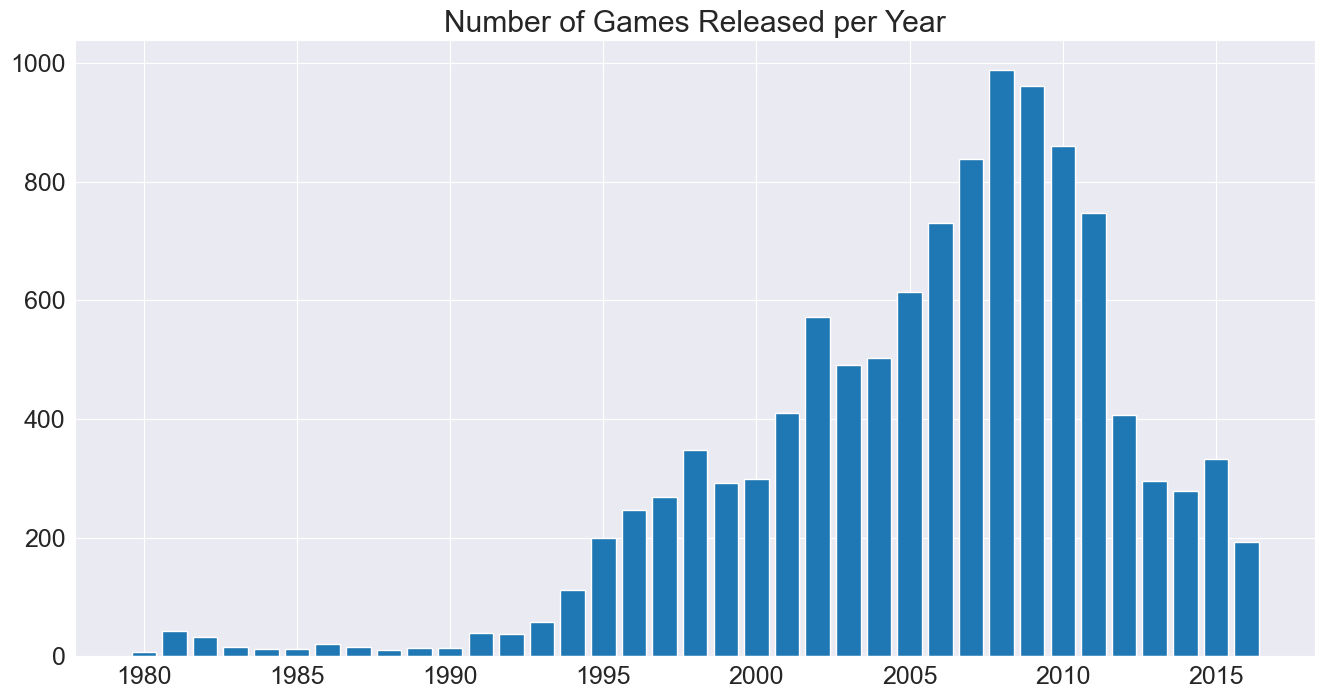

In [8]:
games_unique = vg_df.groupby("Name").first()
games_per_year = games_unique.Year.value_counts().sort_index()
plt.bar(x=games_per_year.index, height=games_per_year)
plt.title("Number of Games Released per Year");

>**NOTE:** The graph above does not take in account games that were ported to other platforms.

<div aligh="justify">The graph above show that the number of games released per year started spiking in 1995 and continued till 2008. The trend started reversing in 2009.</div>

## **Global Video Game Sales** <a class="lvl2" id="sub1"></a>

In [9]:
vg_sales_per_year = vg_df.groupby("Year").sum(numeric_only=True)

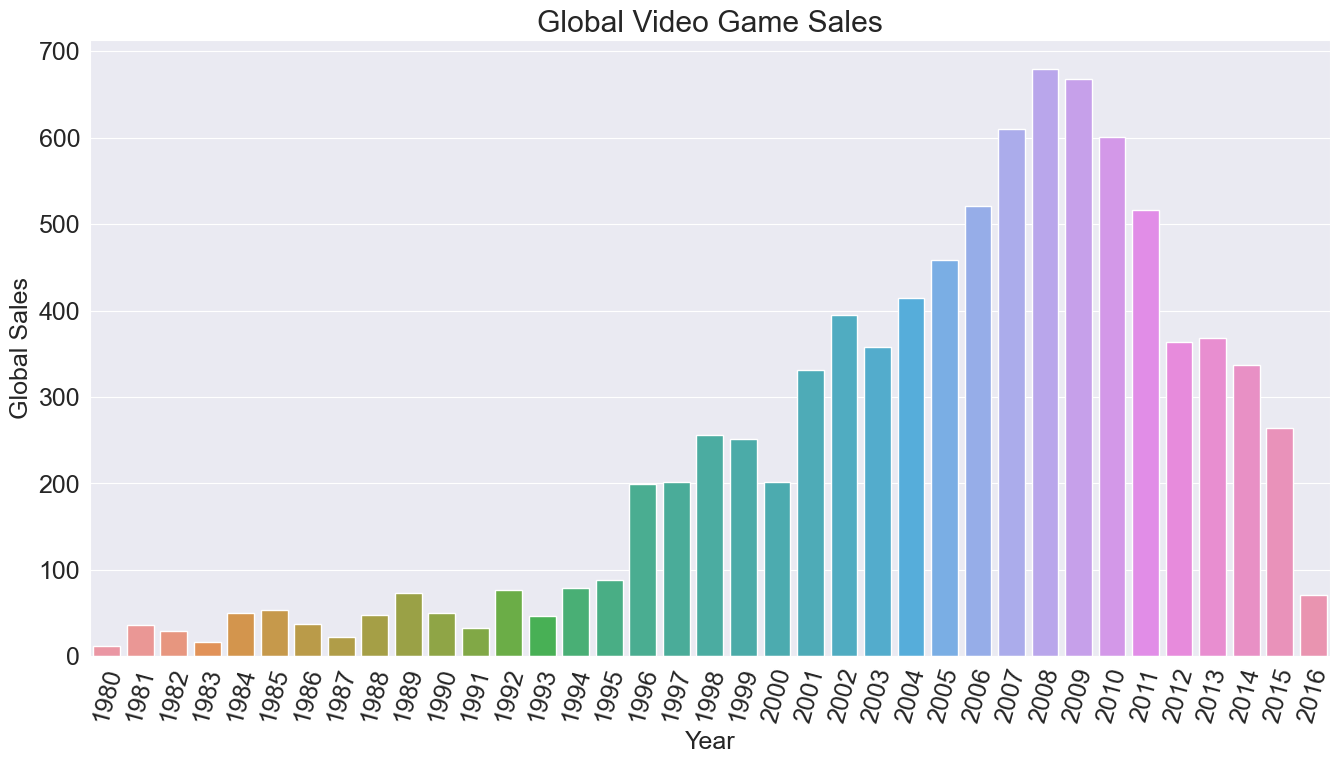

In [131]:
sns.barplot(data=vg_sales_per_year, x=vg_sales_per_year.index, y="Global Sales")
plt.title("Global Video Game Sales")
plt.xticks(rotation=75);

<div align="justify">Overall, video game sales have been on the increase since the the 80s. The trend spiked even more in 1996 and in 2001. In 2008, video game sales had peaked at 678 million game copies sold. The graph above looks quite similar to one on game released per year. This shows that there was a relationship that exists between the number of games released and figures.</div>

## **Which games had the best sales?** <a class="lvl2" id="sub2"></a>

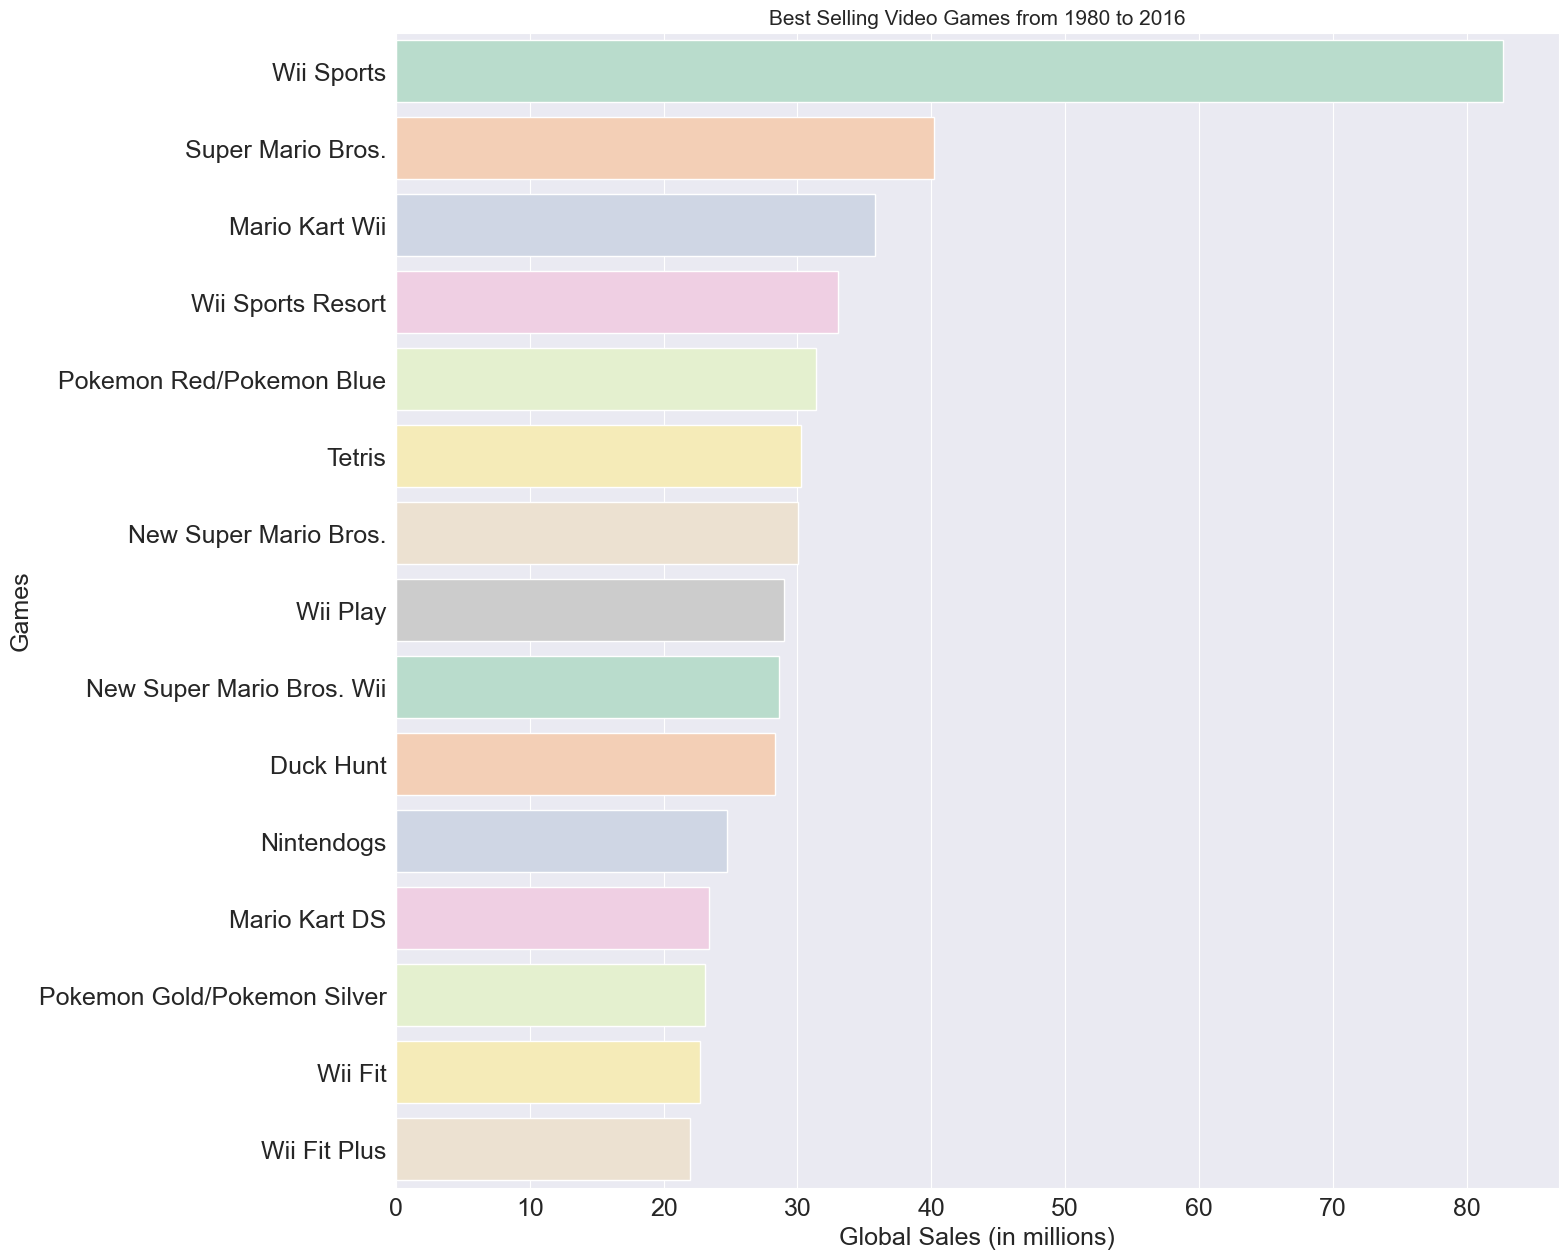

In [11]:
global_sales = vg_df[["Name", "Publisher", "Global Sales"]].head(15)
plt.figure(figsize=(15,15))
sns.barplot(data=global_sales, x="Global Sales", y="Name", palette="Pastel2")
plt.ylabel("Games")
plt.title('Best Selling Video Games from 1980 to 2016', size=15)
plt.xlabel("Global Sales (in millions)");

<div align="justify">From the graph above we can see that Wii Sports which was launched in 2006 had the best sales figures as of 2016 with a sales record of over 80 million. The difference in sales from the second best Super Mario Bros. All ten games best selling games were published by Nintendo.</div>

# **Top Publishers in Terms of Sales** <a class="lvl2" id="sub3"></a>

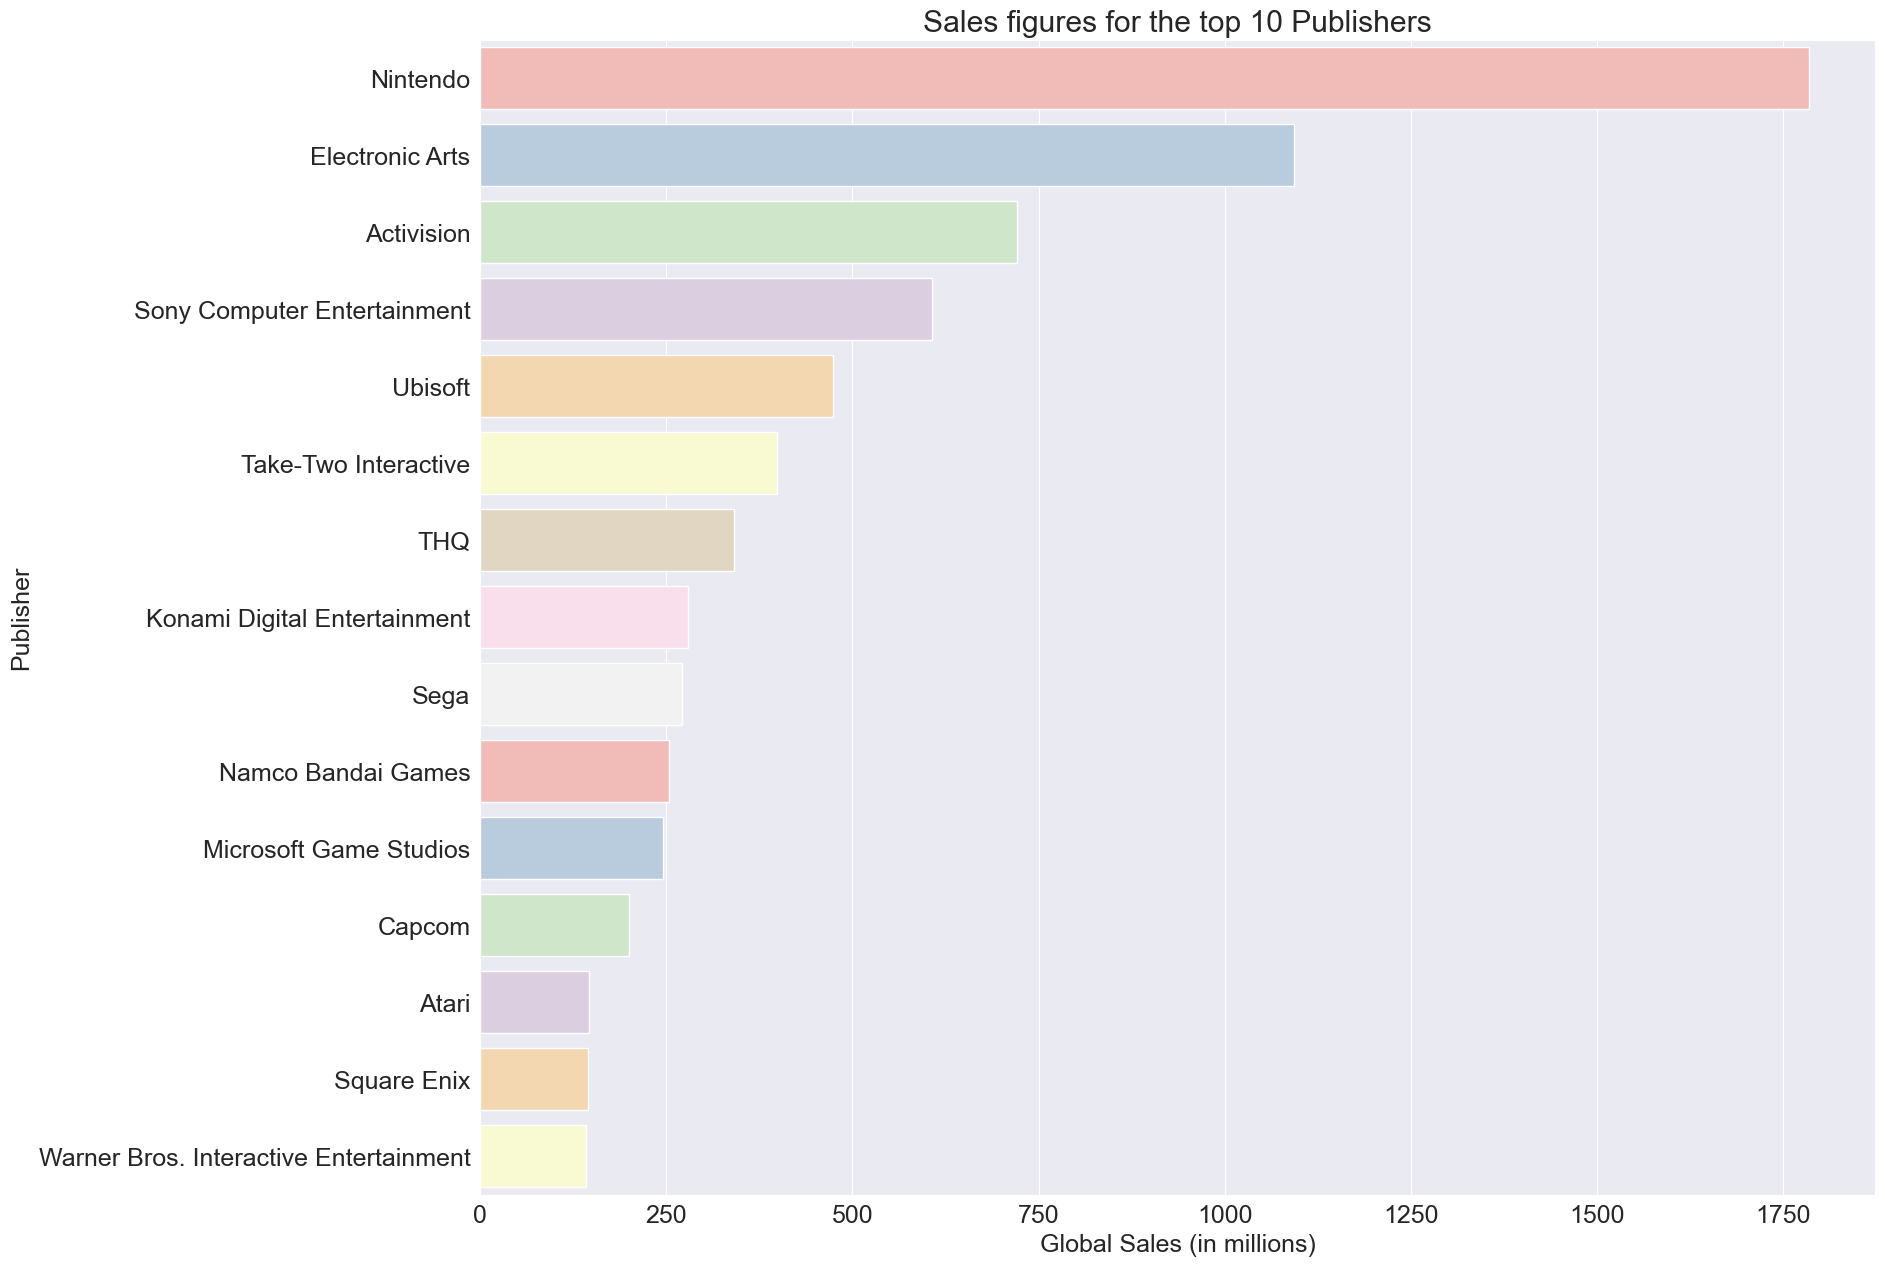

In [12]:
overall_publisher_sales = vg_df.loc[0:, "Publisher":"Global Sales"].groupby(["Publisher"]) \
                               .sum().sort_values(by="Global Sales", ascending=False).head(15)

plt.figure(figsize=(18,15))
sns.barplot(data=overall_publisher_sales, y=overall_publisher_sales.index, x="Global Sales", palette="Pastel1")
plt.title("Sales figures for the top 10 Publishers")
plt.xlabel("Global Sales (in millions)");

<div align="justify">Uptill 2016 Nintendo stands as head in tems of number of game copies sold with over 1.7 billion game copies sold, followed by Electronic Arts with about 1.1 billion copies of games sold. Off course Nintendo will be the top game publisher as it is one of the oldest game publishers with a large number of released games and popular consoles (platforms) like N64 and the Wii. For reference, Nintendo released its first game in 1981.</div>

## **For the best selling publishers show how their sales grew over time**<a class="lvl2" id="sub4"></a>

In [76]:
'''plots graphs in suplot'''
def subs(table, figure, axes, string):
    index = table.index.get_level_values(0).unique()

    for ax, i in zip(axes.flat, index):
        sub_table = table[table.index.get_level_values(0) == i]
        ax.plot(sub_table.index.get_level_values(1), string, data=sub_table)
        ax.set_title(i)
        
    figure.tight_layout()

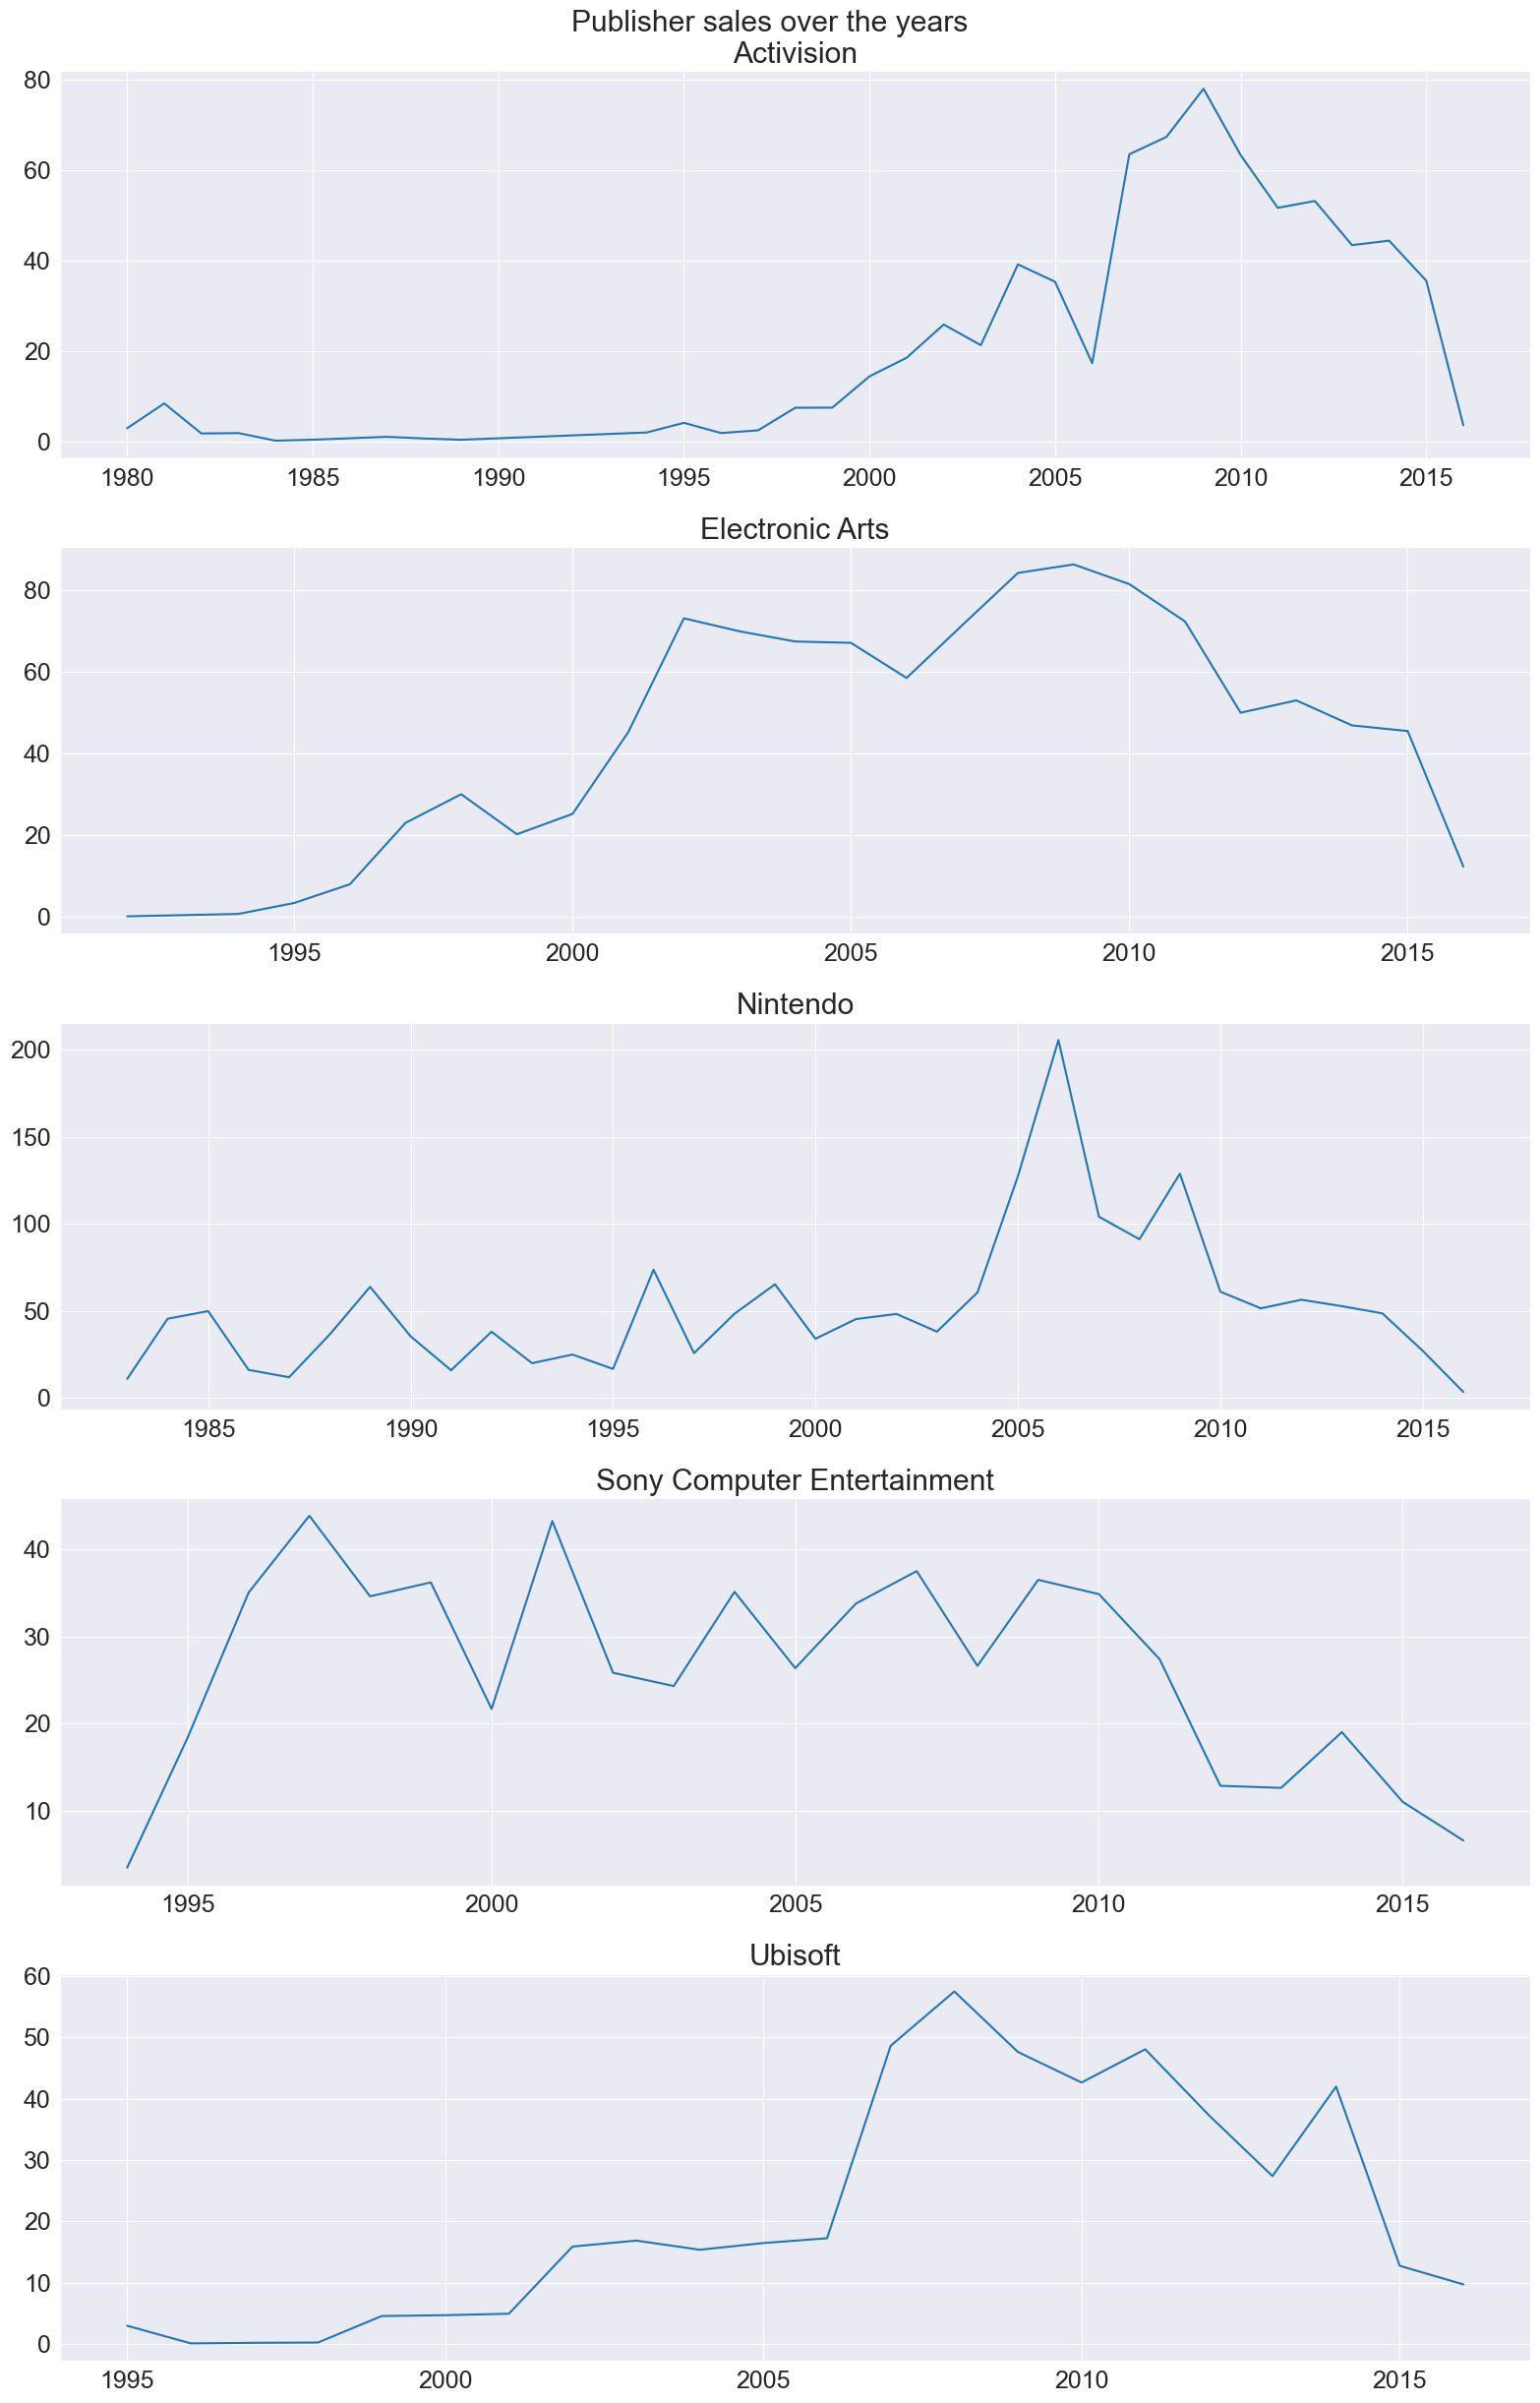

In [192]:
publisher_sales_per_year = vg_df.groupby(["Publisher", "Year"]).sum(numeric_only=True)
top_publisher_sales_per_year = publisher_sales_per_year[publisher_sales_per_year \
                                                       .index.get_level_values(0) \
                                                       .isin(overall_publisher_sales.head(5).index)]

fig2, axes2 = plt.subplots(5, 1, figsize=(16,25))
plt.suptitle("Publisher sales over the years")
columns = vg_df.loc[:, "NA Sales": "Global Sales"].columns
subs(top_publisher_sales_per_year, fig2, axes2, "Global Sales")

## **How many games did the top selling publishers release within this time frame?**<a class="lvl2" id="sub4"></a>

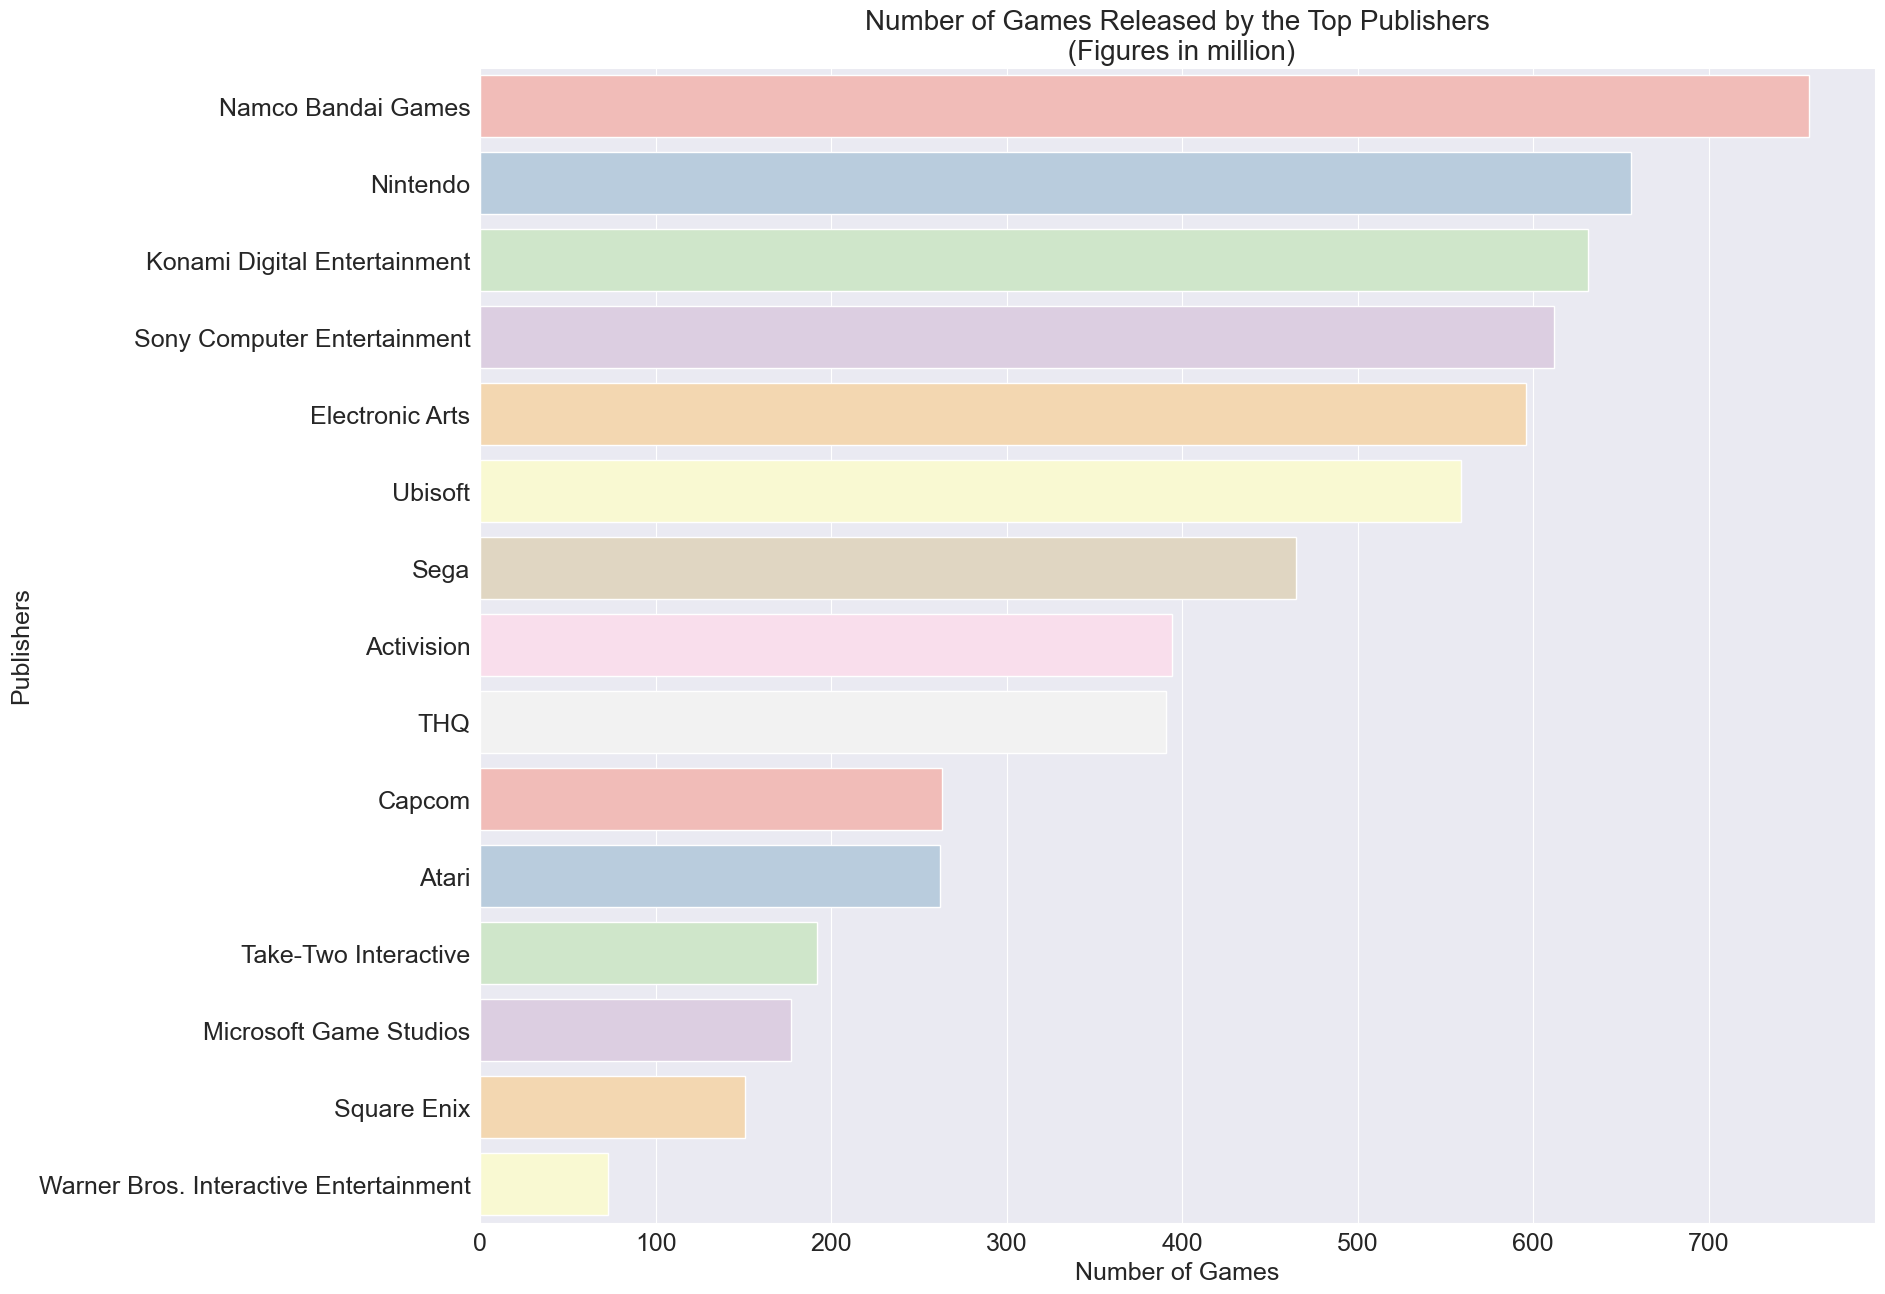

In [14]:
# creates a series of with number of games released by a the publisher from 19080 to 2016
games_per_publisher = games_unique.Publisher.value_counts()
top_publisher_n_games = games_per_publisher[games_per_publisher.index.isin(overall_publisher_sales.index)]

plt.figure(figsize=(18, 15))
sns.barplot(y=top_publisher_n_games.index, x=top_publisher_n_games, palette="Pastel1")
plt.title("Number of Games Released by the Top Publishers\n (Figures in million)", size=20)
plt.xlabel("Number of Games")
plt.ylabel("Publishers");

<div align="justify">Of publishers with the highest games sales, Namco Bandai Games leads the board in overall number of games released with over 700 games on the counter followed by Nintendo, then Konami Digital Entertainment.</div>

<div align="justify">Although the quantity of games released by a publisher seems to play a part in their sales figures, they do not reflect all factors that affect the sales figures. We can see that some publishers such as Namco Bandai who leads the charts in number of games released ranks 10 in the chars for over all game sales, while Take-Two Interactive that ranks 12th in terms of game releases has is 6th in terms of overall sales.</div>

## **Distribution of games by genre**

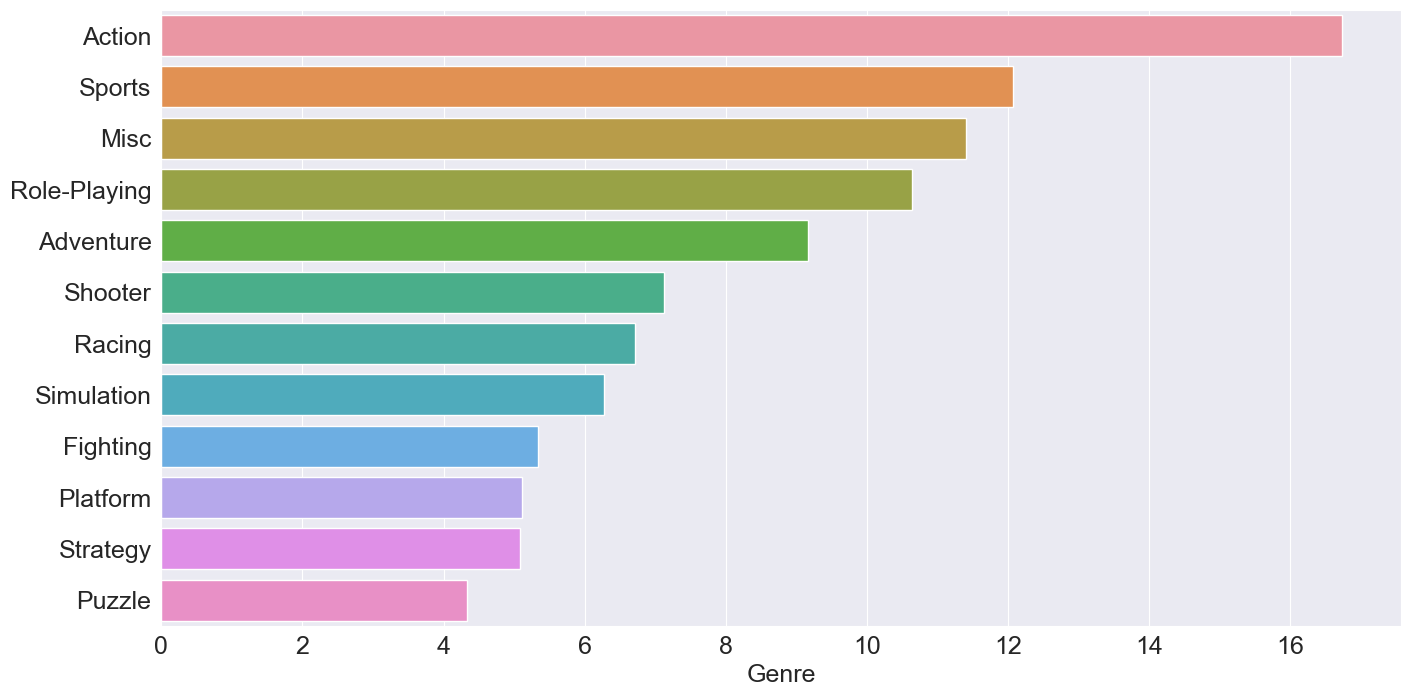

In [16]:
genre_pct = games_unique.Genre.value_counts() *100 / games_unique.Genre.count()
sns.barplot(x=genre_pct, y=genre_pct.index);

## **What were game sales like per genre?**

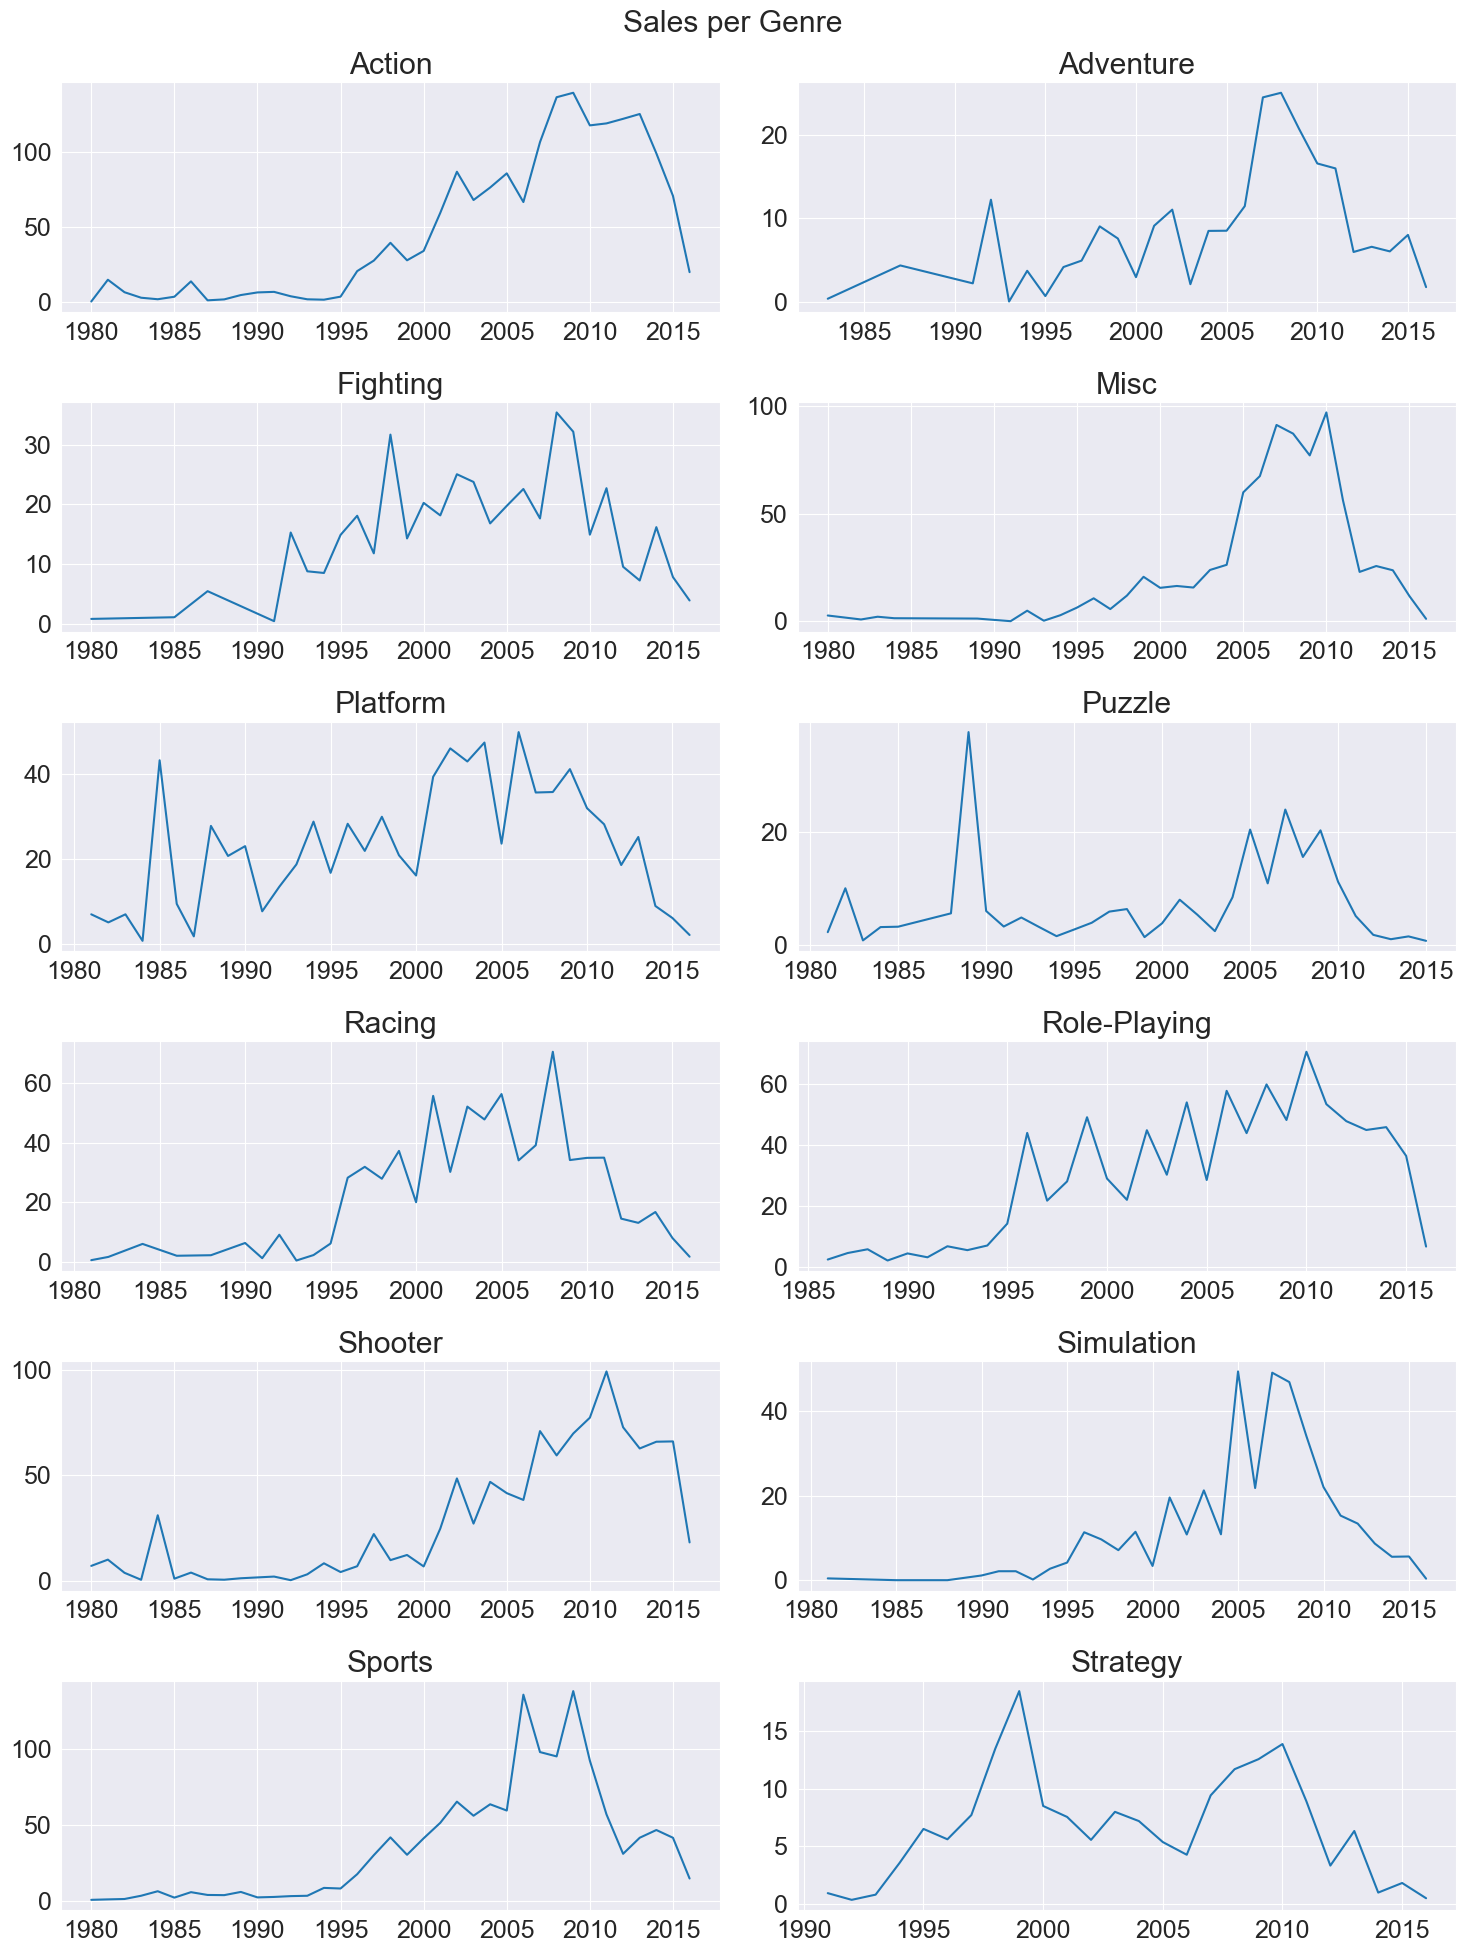

In [184]:
sales_by_genre = vg_df.groupby(["Genre", "Year"]).sum(numeric_only=True)
fig3, axes3 = plt.subplots(6, 2, figsize=(15,20))
plt.suptitle("Sales per Genre")
subs(sales_by_genre, fig3, axes3, "Global Sales")

## **Games per platform**

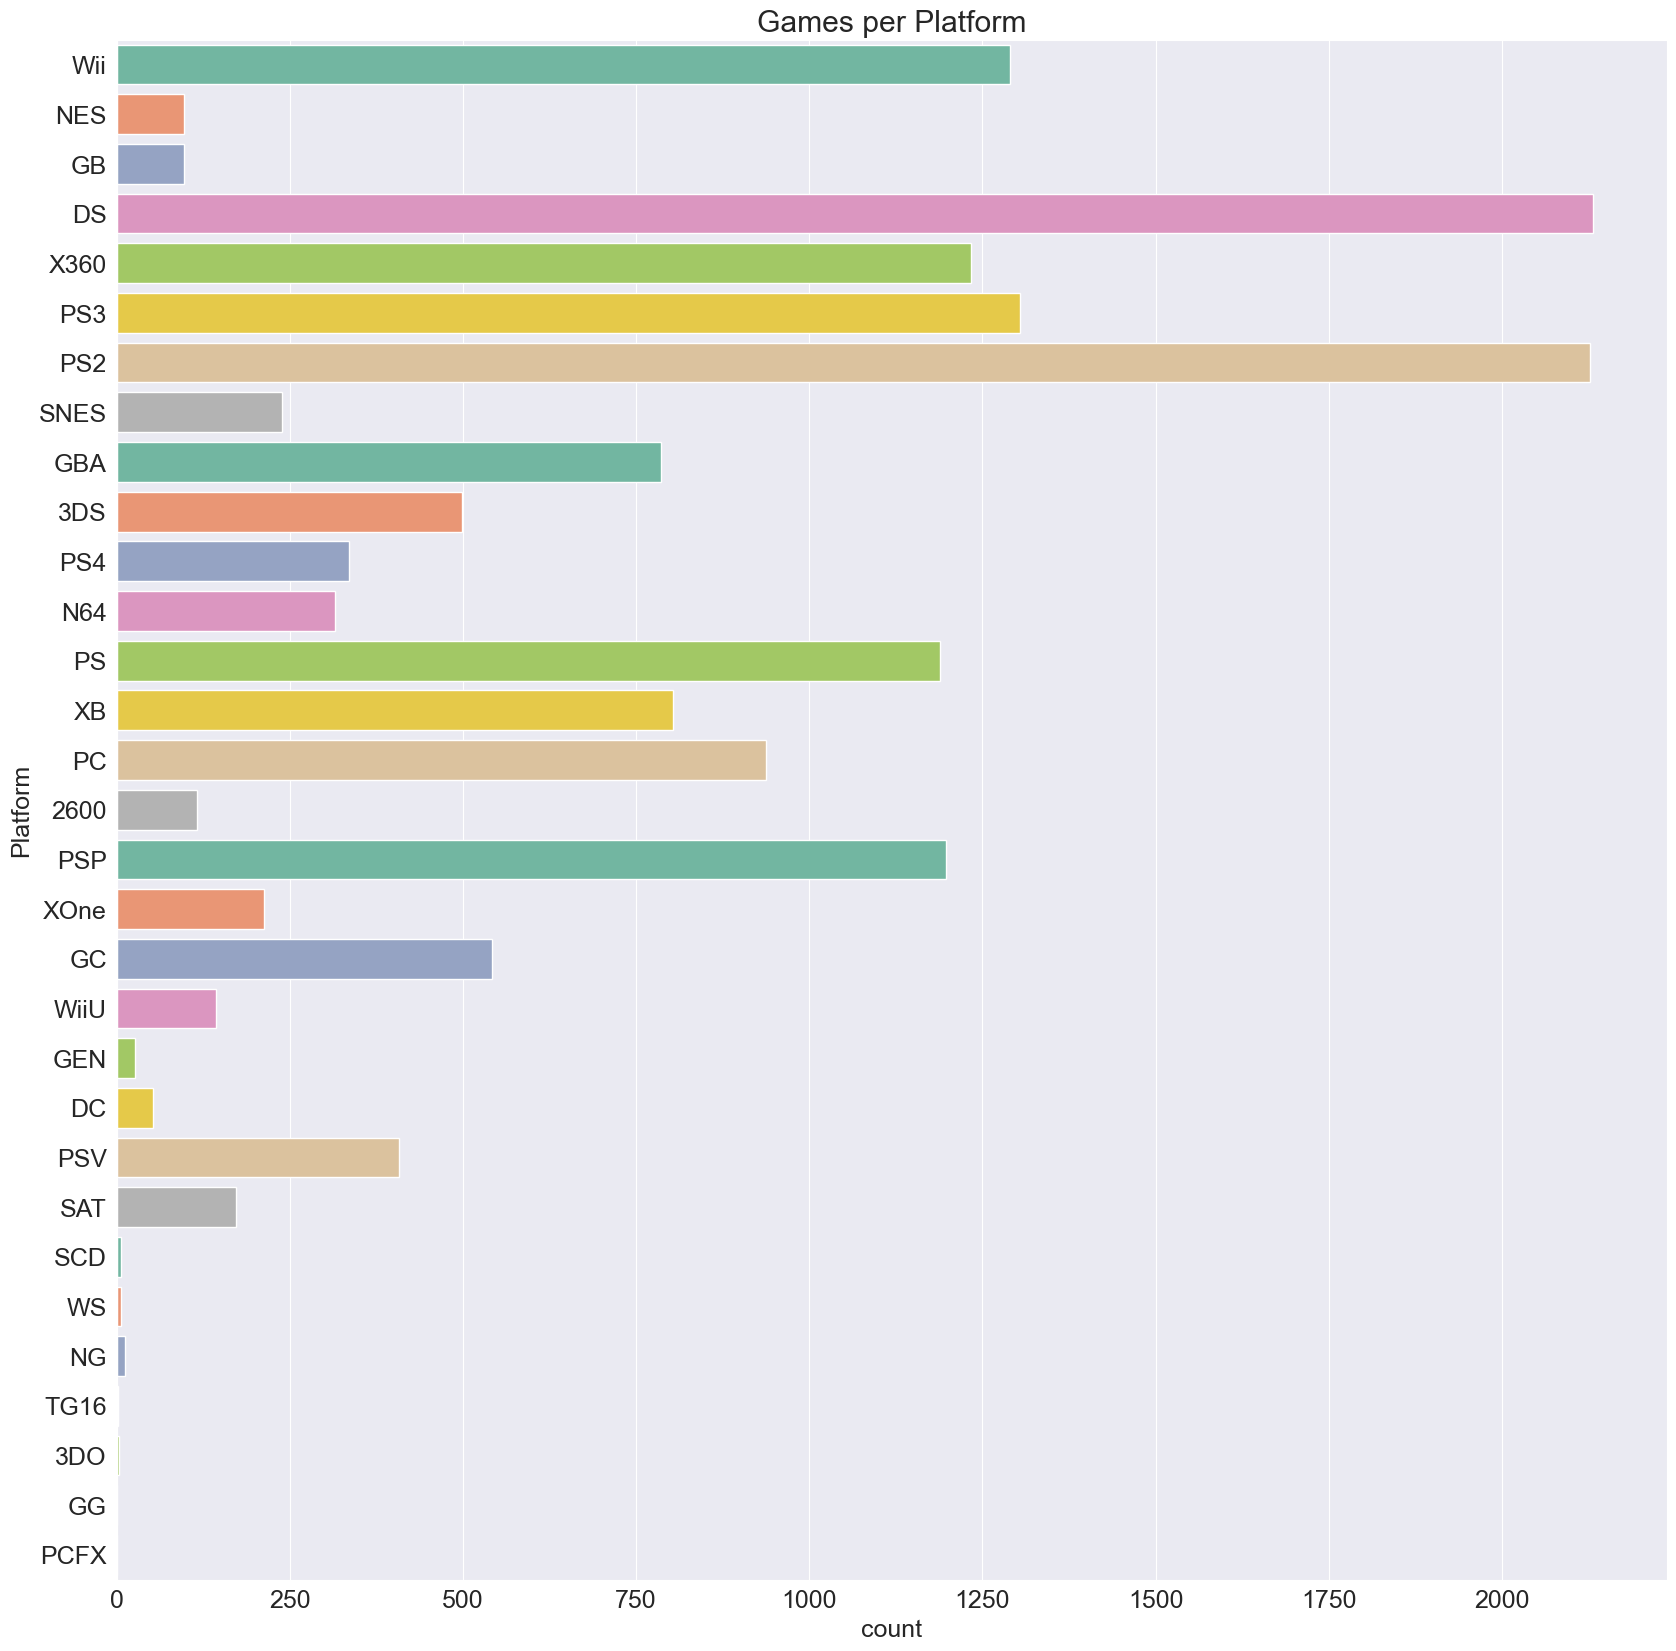

In [90]:
plt.figure(figsize=(20,20))
sns.countplot(y="Platform", data=vg_df, palette="Set2")
plt.title("Games per Platform");

## **Platform Sales**

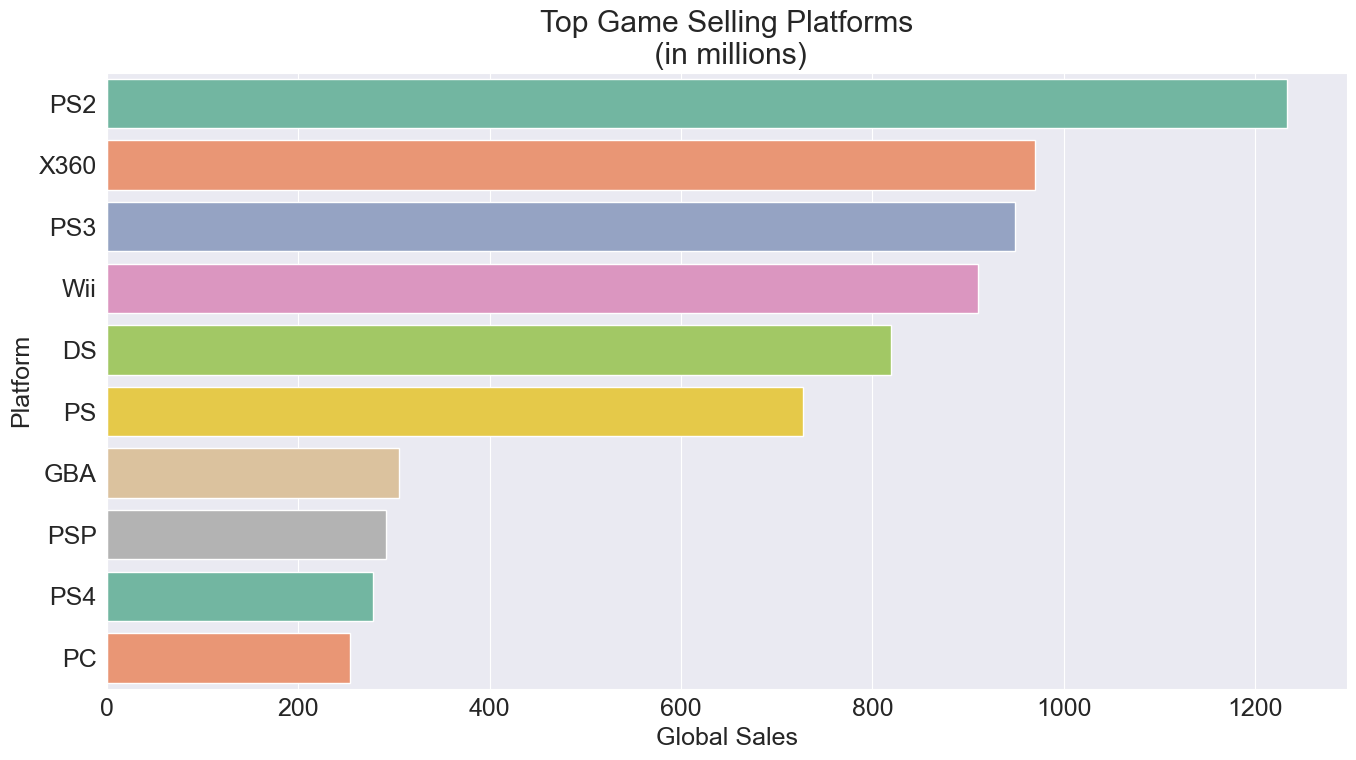

In [106]:
platform_df = vg_df.groupby("Platform").sum(numeric_only=True).loc[:, "NA Sales":"Global Sales"]
top_platform_df = platform_df.sort_values("Global Sales", ascending=False).head(10)
top_platform_df

sns.barplot(x="Global Sales", y=top_platform_df.index, data=top_platform_df, palette="Set2")
plt.title("Top Game Selling Platforms\n (in millions)");

## **Which Game Genre Got the Most Sales Per Platform?**

![Playstion2](https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/PlayStation_2_logo.svg/1920px-PlayStation_2_logo.svg.png)</br>


<div align="justify">
The PlayStation 2 (PS2) is a home video game console developed and marketed by Sony Computer Entertainment. It was first released in Japan on 4 March 2000, in North America on 26 October 2000, in Europe on 24 November 2000, and in Australia on 30 November 2000. It is the successor to the original PlayStation, as well as the second installment in the PlayStation brand of consoles. As a sixth-generation console, it competed with Nintendo's GameCube, and Microsoft's Xbox. It is the best-selling video game console of all time, having sold over 155 million units worldwide.</div>

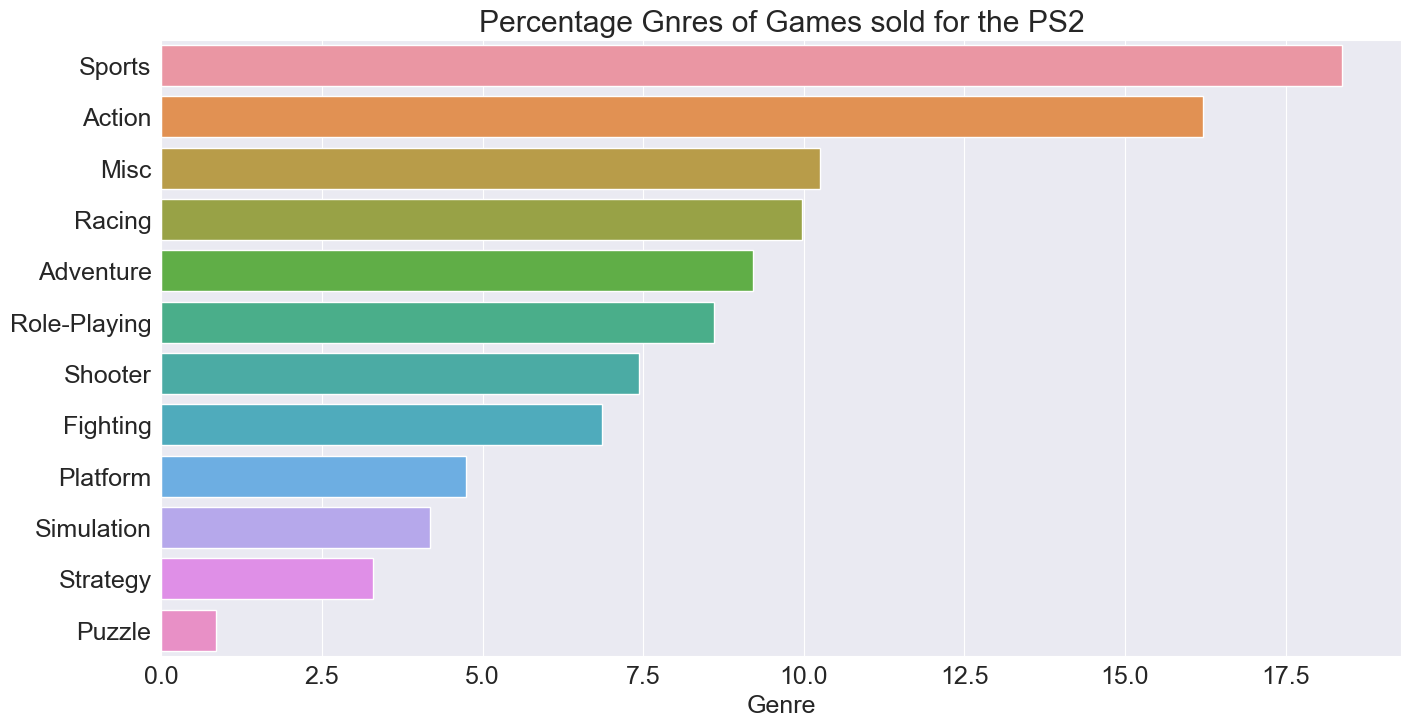

In [149]:
ps2_df = vg_df[vg_df.Platform == "PS2"]
ps2_genres_pct = ps2_df.Genre.value_counts() * 100 / ps2_df.Genre.count()

sns.barplot(y=ps2_genres_pct.index, x=ps2_genres_pct)
plt.title("Percentage Gnres of Games sold for the PS2");

<div align="justify">Playstation 2 players mainly purchased sports and action games accounting together for over 34.6% of PS2 game sales respectively. Other game genres like racing, adventure, Misc, role-playing games, shooter and fighting games where equally quite popular with a 52.32% share of PS2 game sales. On the other hand, platform, simulation, strategy and puzzle all together games only account  for 13% of the PS2 game sales.

</br></div>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/PlayStation_3_logo_%282009%29.svg/1920px-PlayStation_3_logo_%282009%29.svg.png)</br>
<div align="justify">The PlayStation 3 (PS3) is a home video game console developed by Sony Interactive Entertainment. The successor to the PlayStation 2, it is part of the PlayStation brand of consoles. It was first released on November 11, 2006, in Japan, November 17, 2006, in North America, and March 23, 2007, in Europe and Australia. The PlayStation 3 competed primarily against Microsoft's Xbox 360 and Nintendo's Wii as part of the seventh generation of video game consoles. </br></div>

In [165]:
ps3_genres_pct[:3].sum()

56.59509202453987

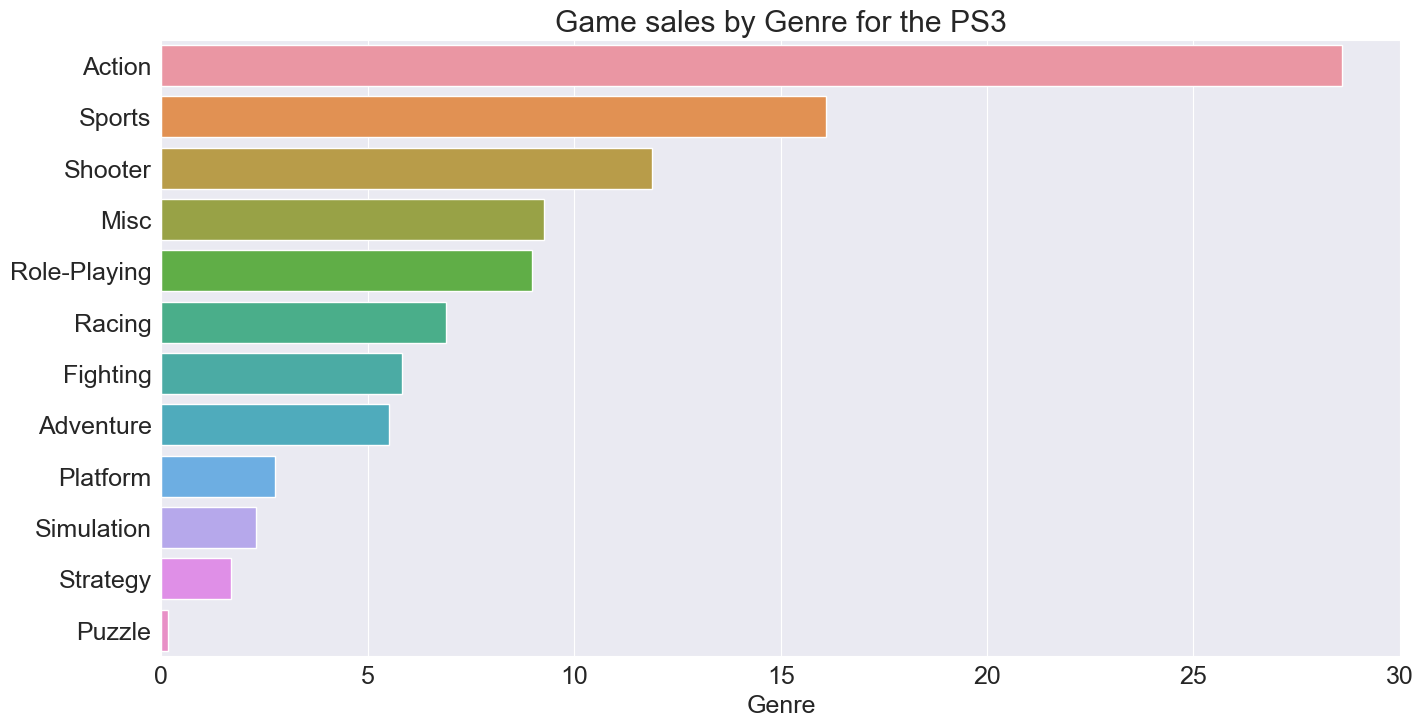

In [162]:
ps3_df = vg_df[vg_df.Platform == "PS3"]
ps3_genres_pct = ps3_df.Genre.value_counts() * 100/ ps3_df.Genre.count()

sns.barplot(y=ps3_genres_pct.index, x=ps3_genres_pct)
plt.title("Game sales by Genre for the PS3");

<div align="justify">Unlike the PS2's game sales, the PS3 game sales were dominated by action games taking a whapping 28% of games sales for the PS3. Sports games and shooter games comme in 2nd and 3rd positions with 16% and 11% of PS3 games sales. These 3 game genres acout together for almost 60% of PS3 game sales.

</br></div>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Xbox_360_logo.svg/1920px-Xbox_360_logo.svg.png)</br>


<div align="justify">The Xbox 360 is a home video game console developed by Microsoft. As the successor to the original Xbox, it is the second console in the Xbox series. It competed with Sony's PlayStation 3 and Nintendo's Wii as part of the seventh generation of video game consoles. It was officially unveiled on MTV on May 12, 2005, with detailed launch and game information announced later that month at the 2005 Electronic Entertainment Expo (E3).</div>

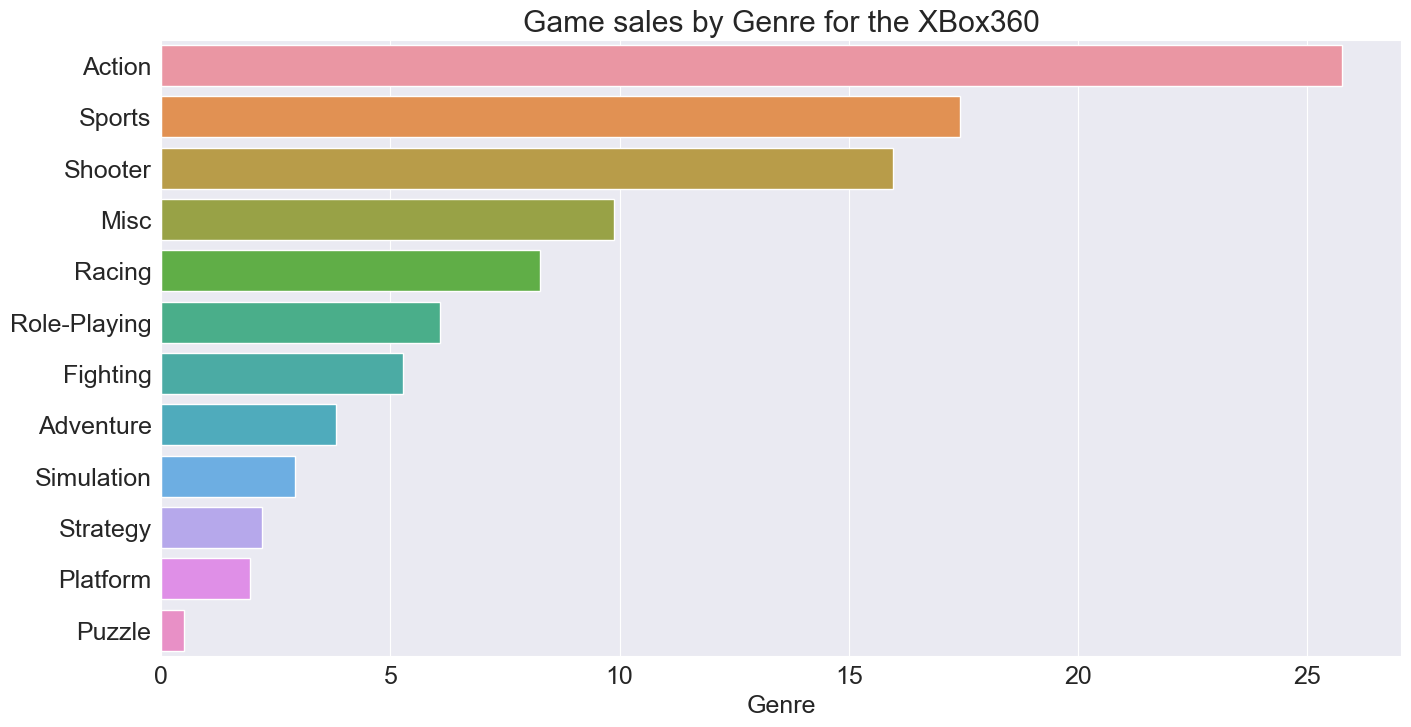

In [167]:
x360_df = vg_df[vg_df.Platform == "X360"]
x360_genres_pct = x360_df.Genre.value_counts() * 100 / x360_df.Genre.count()
ps2_genres

sns.barplot(y=x360_genres_pct.index, x=x360_genres_pct)
plt.title("Game sales by Genre for the XBox360");

<div align="justify">The XBox360's game sales are large dominated by action games with a 25.74% of games sales for the platform being action games. Sports and shooter games on their part account for 17.42% and 15.96% of XBox360 game sales respectively. The other game genres were not as popular as the previous ones as they only had less than 10% share of XBox360 game sales with puzzle games constituting less than 1% of XBox360 game sales.

</br></div>

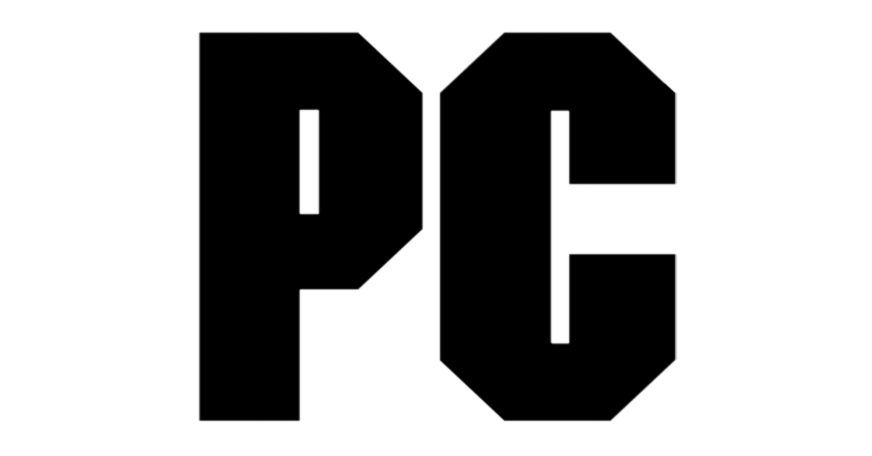</br>

<div align="justify">A personal computer (PC) is a multi-purpose microcomputer whose size, capabilities, and price make it feasible for individual use.[1] Personal computers are intended to be operated directly by an end user, rather than by a computer expert or technician. Unlike large, costly minicomputers and mainframes, time-sharing by many people at the same time is not used with personal computers. Primarily in the late 1970s and 1980s, the term home computer was also used.</div>

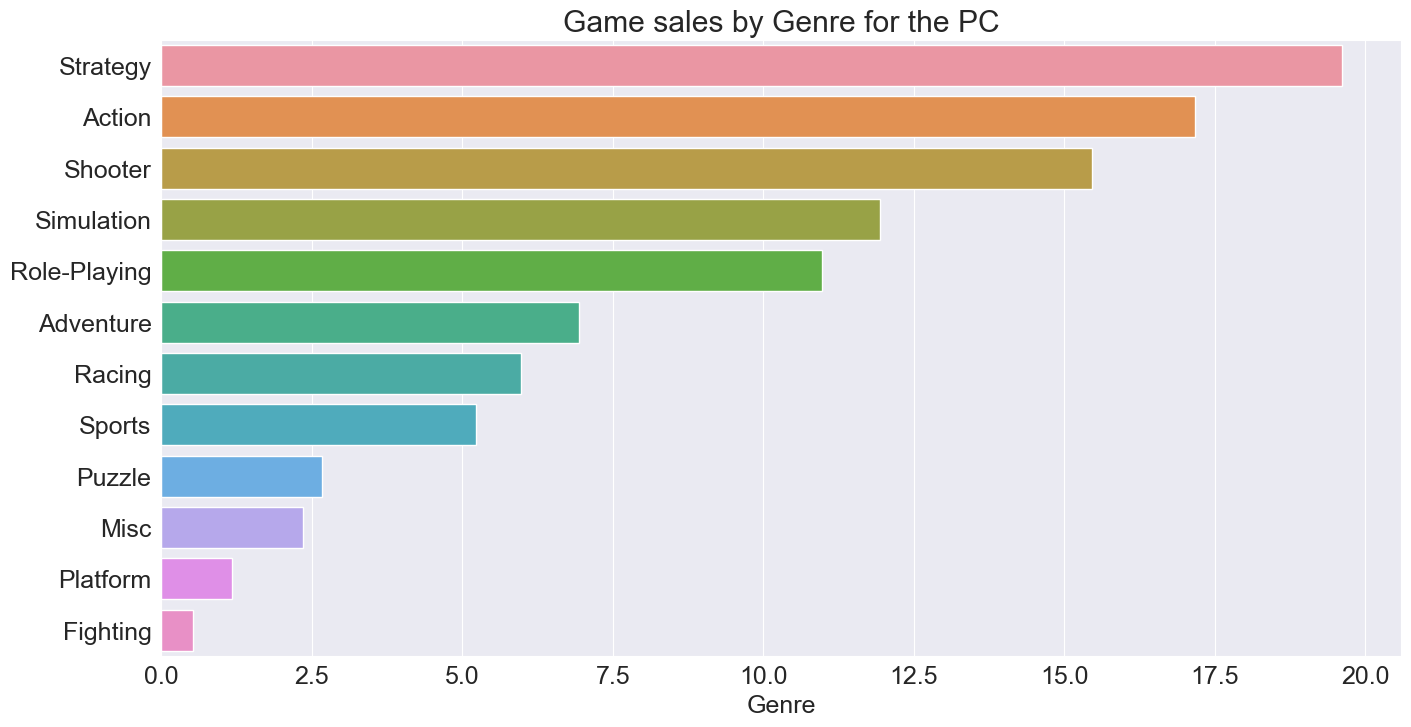

In [170]:
pc_df = vg_df[vg_df.Platform == "PC"]
pc_genres_pct = pc_df.Genre.value_counts() * 100 / pc_df.Genre.count()

sns.barplot(y=pc_genres_pct.index, x=pc_genres_pct)
plt.title("Game sales by Genre for the PC");

<div align="justify">From the graph above we can determine that the top 3 genres are strategy, action and shooter games accounting for 52.23% PC game sales. Simulation and role-playing games account for 22.92% of PC game sales while the rest a account for 24.84% of PC game sales.</div>